<a href="https://colab.research.google.com/github/MindMeltD/Ocaml_HOF-Lecture/blob/main/CICIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start with setting up our drive to download the dataset and clean it up before preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#We will save the downloaded dataset to Google Drive

Mounted at /content/drive


In [ ]:
#The description of CICIDS2017 dataset is accessible at https://www.unb.ca/cic/datasets/ids-2017.html
#we will download the MachineLearningCSV.zip version of this dataset

!wget -nc -O MachineLearningCVE.zip http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/MachineLearningCSV.zip

--2023-10-17 01:51:48--  http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/MachineLearningCSV.zip
Connecting to 205.174.165.80:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235102953 (224M) [application/zip]
Saving to: ‘MachineLearningCVE.zip’

MachineLearningCVE. 100%[===================>] 224.21M  1.27MB/s    in 2m 35s  

2023-10-17 01:54:23 (1.45 MB/s) - ‘MachineLearningCVE.zip’ saved [235102953/235102953]



In [ ]:
#Save the zip and extracted files to Google Drive.

!mkdir -p "/content/drive/My Drive/CICIDS2017/"

!cp MachineLearningCVE.zip "/content/drive/My Drive/CICIDS2017/"

#Now the dataset is saved to your Google Drive at CICIDS2017 folder.

In [ ]:
#Unzip the MachineLearningCVE.zip
!unzip -n "/content/drive/My Drive/CICIDS2017/MachineLearningCVE.zip"

Archive:  /content/drive/My Drive/CICIDS2017/MachineLearningCVE.zip
   creating: MachineLearningCVE/
  inflating: MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  




There are eight files extracted from this zip file.

    Monday-WorkingHours.pcap_ISCX.csv
    Tuesday-WorkingHours.pcap_ISCX.csv
    Wednesday-workingHours.pcap_ISCX.csv
    Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
    Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
    Friday-WorkingHours-Morning.pcap_ISCX.csv
    Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
    Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv

The file Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv contains unrecognized characters.

Change this unrecognized character to -

In [ ]:
import os
import pandas as pd

file_name = os.path.join("MachineLearningCVE", "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")

# Read dataset
df = pd.read_csv(file_name, skipinitialspace=True, error_bad_lines=False)

<ipython-input-5-4c00c841666a>:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_name, skipinitialspace=True, error_bad_lines=False)


In [ ]:
def _renaming_class_label(df: pd.DataFrame):
    labels = {"Web Attack � Brute Force": "Web Attack-Brute Force",
              "Web Attack � XSS": "Web Attack-XSS",
              "Web Attack � Sql Injection": "Web Attack-Sql Injection"}

    for old_label, new_label in labels.items():
        df.Label.replace(old_label, new_label, inplace=True)

# Renaming labels
_renaming_class_label(df)

In [ ]:
# Save to csv
df.to_csv(file_name, index=False)

Combine all of the datasets

In [ ]:
DIR_PATH = "MachineLearningCVE"

FILE_NAMES = ["Monday-WorkingHours.pcap_ISCX.csv",
              "Tuesday-WorkingHours.pcap_ISCX.csv",
              "Wednesday-workingHours.pcap_ISCX.csv",
              "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
              "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
              "Friday-WorkingHours-Morning.pcap_ISCX.csv",
              "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
              "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"]

In [ ]:
df = [pd.read_csv(os.path.join(DIR_PATH, f), skipinitialspace=True) for f in FILE_NAMES]
df = pd.concat(df, ignore_index=True)

In [ ]:
df.Label.value_counts()

BENIGN                      2273097
DoS Hulk                     231073
PortScan                     158930
DDoS                         128027
DoS GoldenEye                 10293
FTP-Patator                    7938
SSH-Patator                    5897
DoS slowloris                  5796
DoS Slowhttptest               5499
Bot                            1966
Web Attack-Brute Force         1507
Web Attack-XSS                  652
Infiltration                     36
Web Attack-Sql Injection         21
Heartbleed                       11
Name: Label, dtype: int64

In [ ]:
df.to_csv(os.path.join(DIR_PATH, "MachineLearningCVE.csv"), index=False)

Copy to Google Drive

In [ ]:
!cp -r "MachineLearningCVE/" "/content/drive/My Drive/CICIDS2017/"
# Now the dataset is saved to your Google Drive at CICIDS2017 folder

Data Loading & Preprocessing:

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# pandas: A library for data manipulation and analysis. It provides data structures like DataFrame for handling and analyzing structured data.
# StandardScaler: A preprocessing utility from scikit-learn that standardizes features by removing the mean and scaling to unit variance.
# LabelEncoder: A utility to encode target labels with value between 0 and n_classes-1.
# train_test_split: A utility function to split datasets into training and testing subsets.


# Load the dataset
data = pd.read_csv('/content/drive/My Drive/CICIDS2017/MachineLearningCVE/MachineLearningCVE.csv')
#This line reads a CSV file into a DataFrame. Replace '/content/drive/My Drive/CICIDS2017/MachineLearningCVE/MachineLearningCVE.csv' with the path to your dataset.

print(data.head(3))

# Separate features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
#  X contains the features. data.iloc[:, :-1] selects all columns except the last one.
#  y contains the labels (or target values). data.iloc[:, -1] selects only the last column.


# Replace 'inf' and '-inf' with 'NaN'
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check if there are any NaN values in the dataset
if X.isnull().sum().sum() > 0:
    # Handle NaN values. For instance, fill NaN with the mean of the column:
    X.fillna(X.mean(), inplace=True)

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
#  Standardization of datasets is a common requirement for many machine learning algorithms.
#  They might behave poorly if the individual features do not look like standard normally distributed data (i.e., Gaussian with 0 mean and unit variance).
#  scaler.fit_transform(X) computes the mean and standard deviation of each feature in X and then scales them.


# Encode the labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)
#  Label encoding is the process of converting categorical data variables so they can be provided to machine learning algorithms to improve predictions. LabelEncoder converts each class under the specified feature to a numerical value.
#  This step assumes that the labels are categorical. If they're already numerical, this step can be skipped.


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#  It's common practice to split the dataset into a training set and a test set.
#  The model is trained on the training set and evaluated on the test set.
#  test_size=0.2 means that 20% of the data will be used as the test set, and the remaining 80% will be the training set.
#  random_state=42 is just a seed for the random number generator used in the function. This ensures reproducibility.


#By the end of this preprocessing phase, you'll have:

#    X_train and y_train: Features and labels for training.
#    X_test and y_test: Features and labels for testing.

#This data is now ready to be used to train a machine learning model.


   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             49188              4                  2                       0   
1             49188              1                  2                       0   
2             49188              1                  2                       0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                           12                            0   
1                           12                            0   
2                           12                            0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                      6                      6                     6.0   
1                      6                      6                     6.0   
2                      6                      6                     6.0   

   Fwd Packet Length Std  ...  min_seg_size_forward  Active Mean  Active Std  \
0                    0.0  ...            

Setting up PyTorch Datasets and DataLoaders:

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
#  torch: This is the main PyTorch library.
#  Dataset: An abstract class representing a dataset in PyTorch. You can create custom datasets by subclassing Dataset and implementing the __len__ and __getitem__ methods.
#  DataLoader: It wraps a dataset and provides minibatches of data. It also offers other utilities like shuffling and parallel data loading.


# This custom dataset class, CICIDSDataset, inherits from PyTorch's Dataset class.
class CICIDSDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.int64)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
#   __init__: The constructor takes in features and labels as arguments and converts them to PyTorch tensors.
#   The data type torch.float32 is typically used for input features, while torch.int64 is used for labels in classification tasks.
#   __len__: This method returns the number of samples in the dataset. This is used by the DataLoader to determine the number of batches.
#   __getitem__: This method retrieves the sample (feature, label pair) at the given index idx. It's used by DataLoader to fetch data during iteration.


# Create datasets
train_dataset = CICIDSDataset(X_train, y_train)
test_dataset = CICIDSDataset(X_test, y_test)
# Here, you're creating instances of the custom dataset for both training and testing data.

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
#  DataLoader is a generator that provides batches of data. The above code wraps the custom datasets in DataLoaders.
#  batch_size=64: This means that the DataLoader will provide data in batches of 64 samples at a time.
#  This is a typical batch size, but it can be adjusted based on the memory capacity of your hardware and the specific needs of your model.
#  shuffle=True: For the training data loader, shuffling is enabled to ensure that the model gets different data orderings across different epochs, which aids in better generalization during training.
#  shuffle=False: For the test data loader, shuffling is typically not necessary since we're just evaluating the model's performance.


#With these DataLoaders set up, during training or evaluation, you can now iterate over them to get batches of data.
#This makes the data feeding process during training organized and efficient, especially for large datasets that don't fit in memory.

Define the Neural Network Model:

In [ ]:
import torch.nn as nn
# torch.nn: This is PyTorch's neural networks library.
# It contains pre-defined layers, loss functions, and optimization methods that are essential for building neural network models


class SimpleNN(nn.Module):
#class SimpleNN(nn.Module): We're defining a new class SimpleNN that inherits from nn.Module.
#Any neural network model in PyTorch should subclass nn.Module.

    def __init__(self, input_dim, output_dim):
#def __init__(self, input_dim, output_dim): The constructor of the class. It takes two arguments:
#input_dim: The number of input features. This would be the number of columns in your feature matrix X.
#output_dim: The number of output classes or labels.

        super(SimpleNN, self).__init__()
#super(SimpleNN, self).__init__(): This line initializes the base nn.Module class. It's a necessary boilerplate when you're subclassing nn.Module.

        self.layer = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )
#self.layer = nn.Sequential(...): This defines a sequential container of layers.
#Layers will be added to it in the order they are passed in the constructor.
#When the model is called to produce an output, data will be passed through these layers in sequence.
#nn.Linear(input_dim, 128): This is a fully connected layer (also known as a dense layer) that takes input_dim inputs and returns 128 outputs.
#The layer contains weights and biases that will be learned during training.
#nn.ReLU(): This is an activation function known as Rectified Linear Unit (ReLU).
#It introduces non-linearity to the model, which allows the neural network to learn more complex functions.
#The next layers (nn.Linear(128, 64) and nn.Linear(64, output_dim)) are additional fully connected layers that progressively reduce the dimensionality of the data.
#The final layer outputs output_dim values, which corresponds to the logits (or raw scores) for each class in the classification task.


    def forward(self, x):
        return self.layer(x)
#def forward(self, x): The forward method defines the forward pass of the neural network. It takes in an input tensor x and returns the output of the neural network.
#return self.layer(x): This line passes the input x through the sequential container self.layer, which contains our neural network's architecture. The output is then returned.


model = SimpleNN(X_train.shape[1], len(set(y)))
# Here, we're creating an instance of the SimpleNN class.
# X_train.shape[1]: This provides the number of features (or columns) in the training data, which corresponds to the input dimension of the neural network.
# len(set(y)): This computes the number of unique labels in the dataset, which corresponds to the output dimension of the neural network.

#With this model instance, you can now proceed to train the neural network on your data, evaluate its performance, and use it for predictions.

Training:

In [ ]:
criterion = nn.CrossEntropyLoss()
#Loss Function (criterion):
#nn.CrossEntropyLoss(): This is the cross-entropy loss function, which is commonly used for classification tasks.
#It measures the difference between the predicted probabilities (from the neural network) and the actual labels.
#For a multi-class classification, it expects raw scores (also known as logits) as the model's output and computes the softmax internally.

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
#Optimizer:
#torch.optim.Adam(...): The Adam optimizer is a popular optimization algorithm used in deep learning.
#It combines the best properties of the AdaGrad and RMSProp algorithms.
#model.parameters(): This returns an iterator over the model's parameters (weights and biases).
#The optimizer uses this to know which parameters it should update.
#lr=0.001: This is the learning rate, a hyperparameter that determines the step size the optimizer should take to minimize the loss.
#A smaller learning rate might converge slowly, while a larger one might overshoot the minimum.


# Training loop
num_epochs = 10
#num_epochs = 10: This sets the number of times the training loop will iterate over the entire dataset.
#Each iteration over the full dataset is called an epoch.

for epoch in range(num_epochs):
#Outer Loop (for epoch in range(num_epochs)):
#This loop represents each pass over the entire dataset.

    for i, (features, labels) in enumerate(train_loader):
#Inner Loop (for i, (features, labels) in enumerate(train_loader)):
#This loop iterates over batches of data from the train_loader.
#For each iteration, it provides a batch of features (input data) and labels (true class labels).

        outputs = model(features)
        loss = criterion(outputs, labels)
#Forward Pass:
#outputs = model(features): This line passes the batch of features through the model to get the predicted outputs.
#loss = criterion(outputs, labels): Here, the loss function computes the difference between the predicted outputs and the true labels.

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
#Backward Pass & Optimization:
#optimizer.zero_grad(): Before computing the gradients, we need to zero out any existing gradients to avoid accumulation from previous iterations.
#loss.backward(): This computes the gradient of the loss concerning the model's parameters (derivatives). Essentially, it figures out how much each parameter contributed to the error.
#optimizer.step(): This line updates the model's parameters using the gradients computed in the previous step. It attempts to minimize the loss.


    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
#Logging:
#print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}"): After each epoch, this line prints the epoch number and the loss for the last batch in that epoch.
#The .item() method is used to get the value of the loss as a Python number.


#This training process – consisting of forwarding passes to make predictions,
#computing the loss, and backward passes to update the model's weights – continues until all epochs are completed.
#The goal is for the model to have adjusted its weights and biases to minimize the loss, and thereby improve its predictions.

Epoch [1/10], Loss: 0.0357
Epoch [2/10], Loss: 0.0003
Epoch [3/10], Loss: 0.0234
Epoch [4/10], Loss: 0.0090
Epoch [5/10], Loss: 0.0124
Epoch [6/10], Loss: 0.0000
Epoch [7/10], Loss: 0.0002
Epoch [8/10], Loss: 0.0001
Epoch [9/10], Loss: 0.1621
Epoch [10/10], Loss: 0.0021


The Neural Net we just built is a Feedforward Neural Network (FNN), also commonly referred to as a Multilayer Perceptron (MLP) when it has one or more hidden layers. The depth and width (number of neurons in hidden layers) of such networks can be adjusted based on the complexity of the data and the task at hand.

Feedforward Architecture: The data flows in one direction, from the input layer, through one or more hidden layers, and finally to the output layer. There are no cycles or loops in the network, as you'd find in Recurrent Neural Networks (RNNs).

Fully Connected Layers: Each neuron in a layer is connected to every neuron in the previous and subsequent layers. This is evident from the use of the nn.Linear module in the code.

Activation Functions: The ReLU (Rectified Linear Unit) activation function is applied after the linear transformations. It introduces non-linearity into the model, enabling the network to learn more complex patterns.

Multiclass Classification: The final layer of the network has a number of neurons equal to the number of classes in the dataset. The network will output raw scores (logits) for each class, and the nn.CrossEntropyLoss (used in the training code) implicitly applies a softmax function to these logits to produce class probabilities.

Evaluation:

In [ ]:
model.eval()
# model.eval() switches the model to "evaluation mode".
# This is important because some layers in the neural network,
# like dropout or batch normalization, behave differently during training and evaluation.
# For example, during training, dropout randomly zeroes out some activations, but during evaluation,
# it doesn't modify the activations at all.


correct = 0
total = 0

# 'correct' will keep track of the number of predictions that the model got right.
# 'total' will keep track of the total number of predictions made.

with torch.no_grad():

# torch.no_grad() is a context manager that disables gradient computation.
# During evaluation, we don't need gradients because we aren't updating the model.
# Disabling gradient computation reduces memory consumption and speeds up the evaluation.

    for features, labels in test_loader:
        outputs = model(features)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# The DataLoader (test_loader) provides batches of test data.
# For each batch, it gives the features (input data) and the corresponding labels (true class labels).
# outputs contains the raw prediction scores for each class. For example, if there are ten classes, each row in outputs will contain ten scores.
# torch.max(outputs, 1) returns the maximum score and its index for each row along dimension 1 (columns).
# The maximum score's index corresponds to the predicted class. The _ is a placeholder for the actual scores, which we don't need in this context.

# labels.size(0) gives the number of samples in the current batch, which is added to the total.
# (predicted == labels) creates a boolean tensor where each element is True if the prediction is correct and False otherwise.
# By summing over this tensor, we get the number of correct predictions in the current batch. .item() extracts the number from the resulting tensor, which is then added to the correct counter.


print(f"Accuracy: {100 * correct / total:.2f}%")

# The accuracy is computed as the ratio of correct predictions to the total number of predictions, multiplied by 100 to get a percentage.
# This evaluation process provides an estimate of the model's performance on unseen data (the test set) by calculating the accuracy.
# Depending on the problem and dataset, you might also want to compute other metrics such as precision, recall, F1-score, or AUC-ROC.

Accuracy: 99.37%


Generate predictions for the entire test set:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for features, labels in test_loader:
        outputs = model(features)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


Plot the Confusion Matrix:

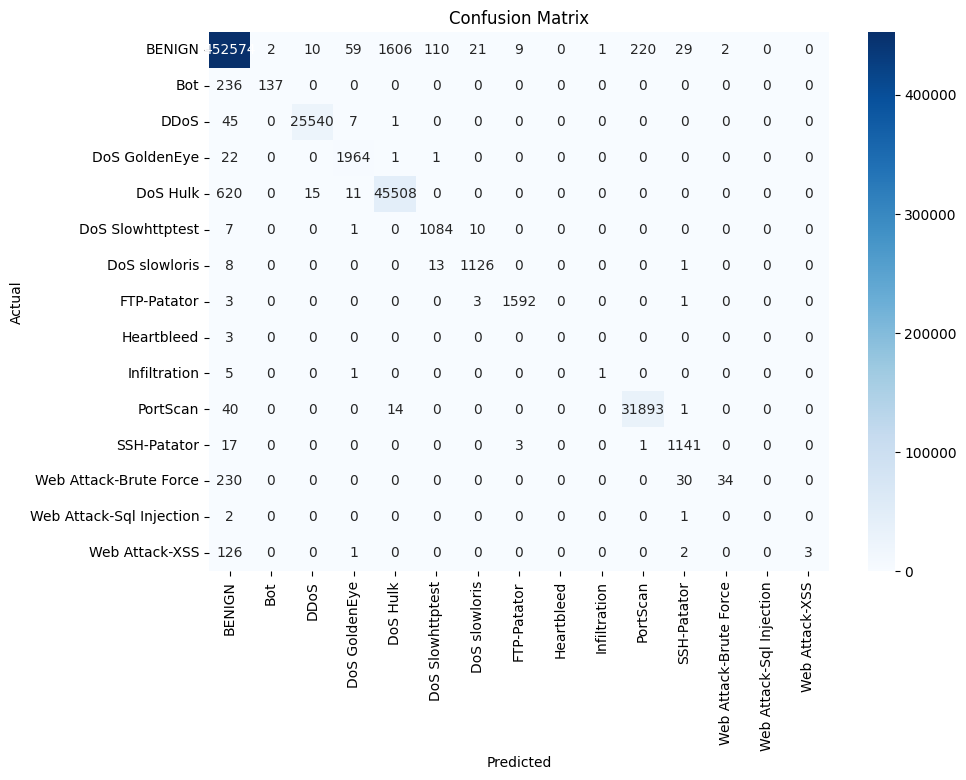

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='g', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

classes = encoder.classes_  # Assuming 'encoder' is the LabelEncoder used earlier
plot_confusion_matrix(all_labels, all_preds, classes)


Display Class-wise Accuracy:

In [ ]:
def display_classwise_accuracy(y_true, y_pred, classes):
    report = classification_report(y_true, y_pred, target_names=classes, output_dict=True, zero_division=1)
    for class_name, metrics in report.items():
        if class_name in classes:
            print(f"{class_name}: {metrics['precision'] * 100:.2f}%")

display_classwise_accuracy(all_labels, all_preds, classes)

BENIGN: 99.70%
Bot: 98.56%
DDoS: 99.90%
DoS GoldenEye: 96.09%
DoS Hulk: 96.56%
DoS Slowhttptest: 89.74%
DoS slowloris: 97.07%
FTP-Patator: 99.25%
Heartbleed: 100.00%
Infiltration: 50.00%
PortScan: 99.31%
SSH-Patator: 94.61%
Web Attack-Brute Force: 94.44%
Web Attack-Sql Injection: 100.00%
Web Attack-XSS: 100.00%


 Visualizing the results can provide a clearer understanding of the model's performance and where it might be going wrong. Here are a few commonly used visualizations for classification tasks:

*   Confusion Matrix: Shows the actual versus predicted classifications.

*   Class-wise Accuracy: Helps understand which classes the model performs well on and which it doesn't.

*   ROC Curve and AUC: For binary classification, this visualizes the performance of the classifier.



Executing these visualizations will give you insights into how your model performs across different classes. If you see certain classes with lower accuracy, it might indicate that you need more training data for those classes or that there are hard-to-classify samples present.

If you're dealing with a binary classification task, the ROC Curve and AUC are also valuable visualizations to consider.